In [1]:
import numpy as np
import matplotlib.pyplot as plt

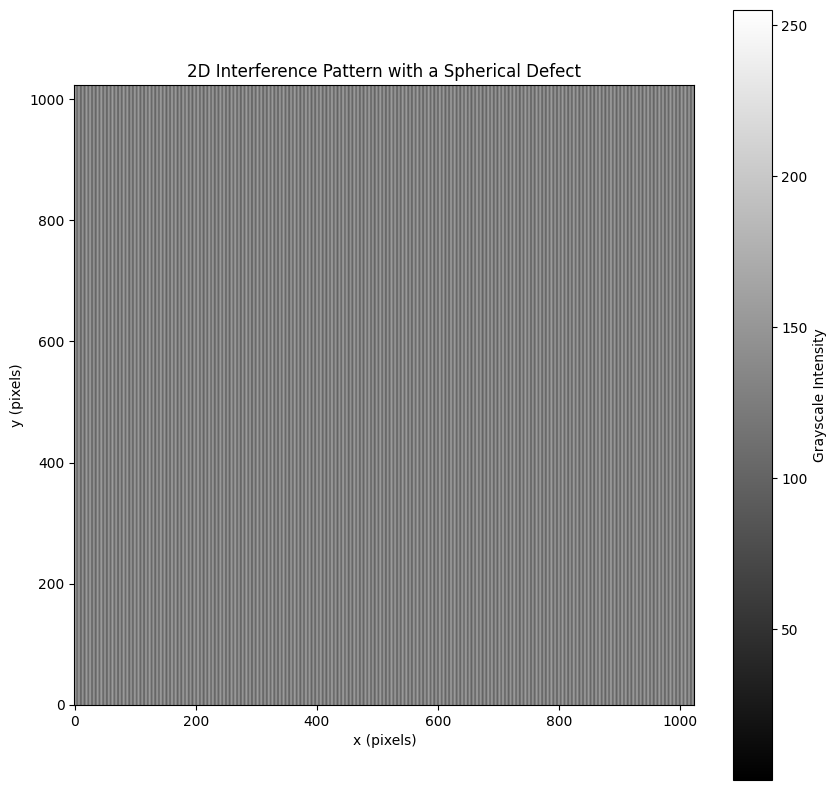

In [7]:
I0 = 1.0             # Peak intensity
theta = np.deg2rad(20) # Wedge angle in radians
wavelength = 632.8e-9 # Wavelength of light in meters (red laser)
k = 2 * np.pi / wavelength # Wave number

# Image dimensions
image_size = 10240
center = image_size // 2
x = np.linspace(-image_size/2, image_size/2, image_size)
y = np.linspace(-image_size/2, image_size/2, image_size)
X, Y = np.meshgrid(x, y)

# Defect parameters
h0 = 200e-9 # Maximum height of the spherical defect (200 nm)
r = np.sqrt(X**2 + Y**2) # Radius from the center
R = (r**2 + h0**2) / (2 * h0) # Radius of curvature of the defect

# Defining the height of the defect
h = np.where(r <= R, np.sqrt(R**2 - r**2) - np.sqrt(R**2 - h0**2), 0)

# Calculating the optical path difference due to the wedge and the defect
d = X * np.tan(theta) + 2 * h # Optical path difference

# Intensity pattern
I = 4 * I0 * (np.sin(k * d/2))**2

# Scale the intensity to 8-bit grayscale values
I_scaled = I / np.max(I) * 255

# Plot the interference pattern
plt.figure(figsize=(10, 10))
plt.imshow(I_scaled, cmap='gray', origin='lower')
plt.colorbar(label='Grayscale Intensity')
plt.title('2D Interference Pattern with a Spherical Defect')
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.show()
